### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Sales Data

The dataset used is the sales dataset from 2010-2018 of the number of products sold on each of the days.

# Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
path = r'C:\Users\Arjun\Desktop\Career Foundry\Airbnb'

In [6]:
path

'C:\\Users\\Arjun\\Desktop\\Career Foundry\\Airbnb'

In [20]:
# Importing the dataset of Product Sales 
df_sales = pd.read_csv(os.path.join(path,'Data','Original Data','train.csv'), index_col = False)

In [21]:
#Validating the imported dataset
df_sales.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [22]:
#Checking the dimension
df_sales.shape

(230090, 4)

In [23]:
df_sales.columns

Index(['Date', 'store', 'product', 'number_sold'], dtype='object')

In [24]:
type(df_sales)

pandas.core.frame.DataFrame

In [26]:
#Checking the datatyoes of the data frame
df_sales.dtypes

Date           object
store           int64
product         int64
number_sold     int64
dtype: object

In [27]:
# convert date datatype to datetime
df_sales['Date']=pd.to_datetime(df_sales['Date'], infer_datetime_format=True)

In [28]:
#Confirming the datatypes again
df_sales.dtypes

Date           datetime64[ns]
store                   int64
product                 int64
number_sold             int64
dtype: object

#  Subsetting, wrangling, and cleaning time-series data

In [63]:
sales_new = df_sales[['Date','number_sold']]

In [64]:
sales_new.head()

,Date,number_sold
0,2010-01-01,801
1,2010-01-02,810
2,2010-01-03,818
3,2010-01-04,796
4,2010-01-05,808


In [65]:
#Checking the datatype of the new dataset
type(sales_new)

pandas.core.frame.DataFrame

In [71]:
sales_final = sales_new.groupby('datetime')['number_sold'].sum()

In [87]:
sales_correct=sales_final.reset_index()
sales_correct.head()

,datetime,number_sold
0,2010-01-01,54870
1,2010-01-02,54960
2,2010-01-03,54863
3,2010-01-04,54926
4,2010-01-05,54634


In [88]:
sales_sub= sales_correct.loc[(sales_correct['datetime']>= '2013-01-01') & (sales_correct['datetime']<= '2018-12-31')]
sales_sub.shape

(2191, 2)

In [89]:
sales_sub.head()

,datetime,number_sold
1096,2013-01-01,54562
1097,2013-01-02,54594
1098,2013-01-03,54571
1099,2013-01-04,54538
1100,2013-01-05,54782


In [90]:
# Set the "Date" column as the index

from datetime import datetime

sales_sub = sales_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
sales_sub.head()

,number_sold
datetime,
2013-01-01,54562
2013-01-02,54594
2013-01-03,54571
2013-01-04,54538
2013-01-05,54782


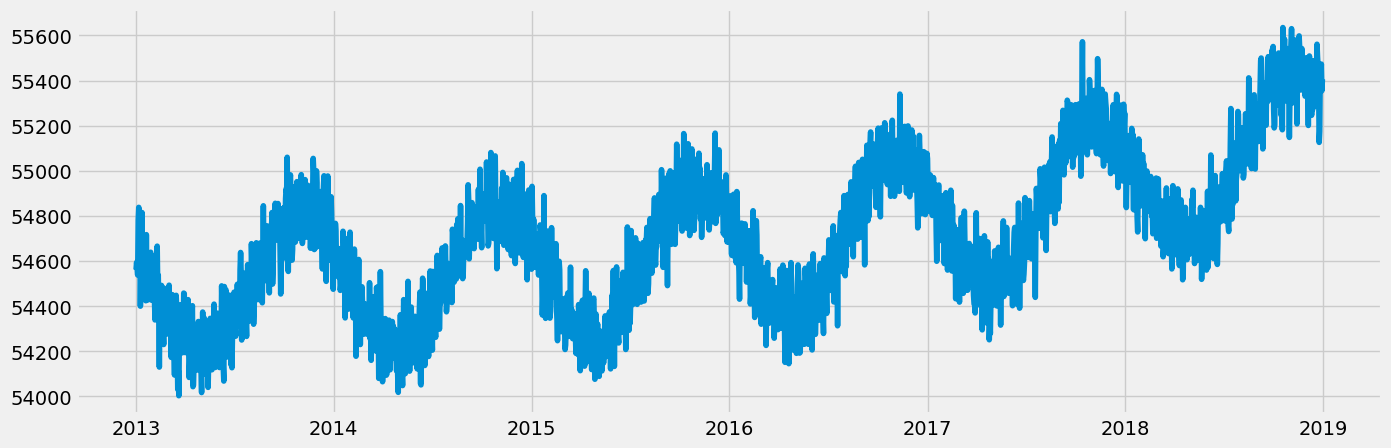

In [91]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(sales_sub)

In [93]:
#Checking for the missing values
sales_sub.isnull().sum()

number_sold    0
dtype: int64

In [94]:
#Checking for Duplicates
dups = sales_sub.duplicated()
dups.sum()

1148

These duplicate rows are of the Individual dates of each month within the years 2010-2018 and I have done a groupby of the individual dates and the number of products sold for those dates. Hence, the noise within the chart. The duplicate rows is the result of the groupby on the dates. I want to retain the duplicate rows for the time series Analysis.

# Time series Analysis: Decomposition

In [95]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sales_sub, model='additive')

In [96]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

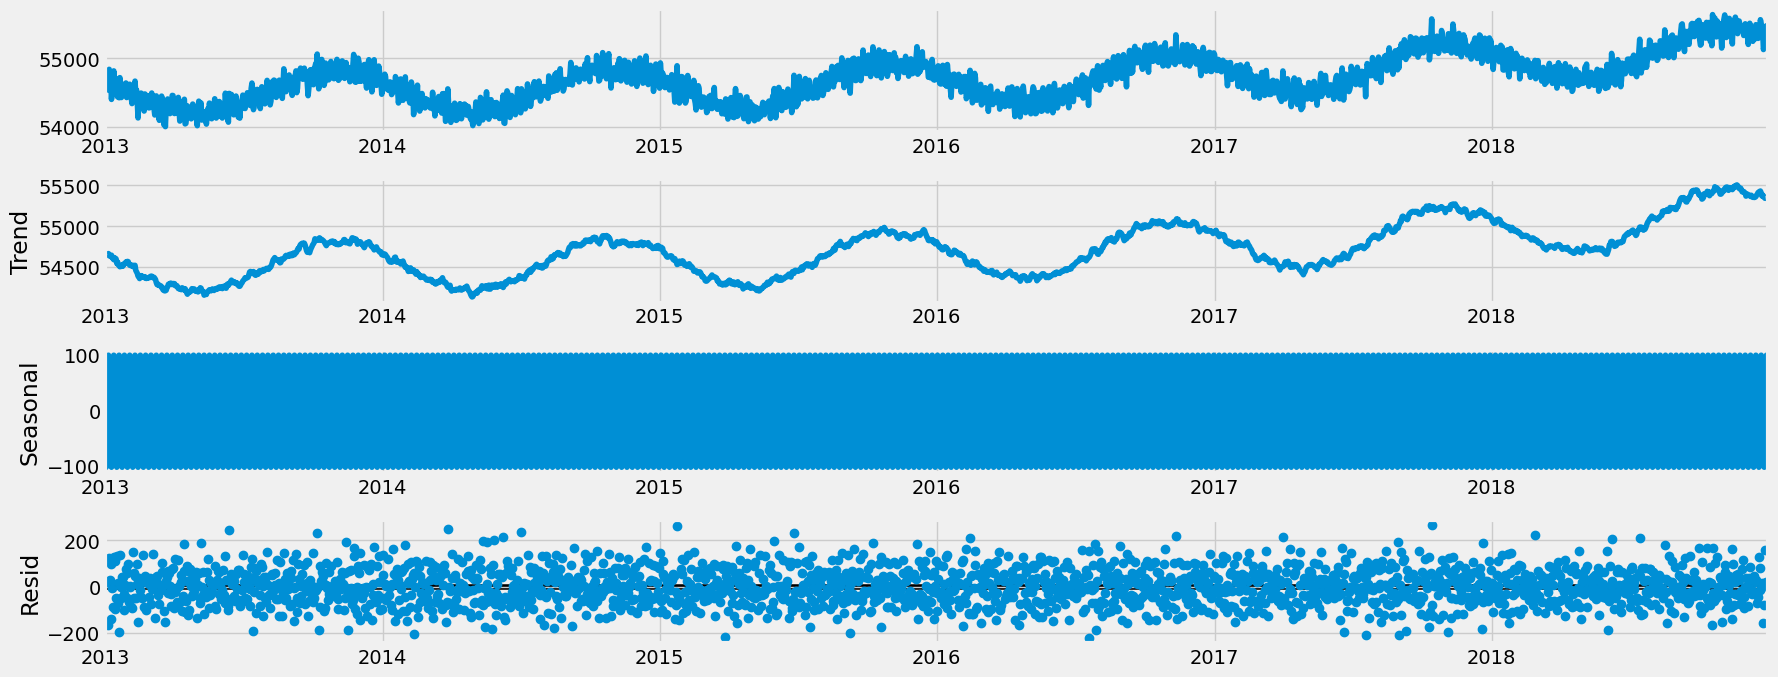

In [97]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for Stationarity

In [98]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sales_sub['number_sold'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.508325
p-value                           0.529389
Number of Lags Used              25.000000
Number of Observations Used    2165.000000
Critical Value (1%)              -3.433374
Critical Value (5%)              -2.862876
Critical Value (10%)             -2.567481
dtype: float64


Test Statistic is not smaller than critical values, therefore we cannot reject our null hypothesis or the presence of a unit root. Hence, we can conclude that the data is not stationary.

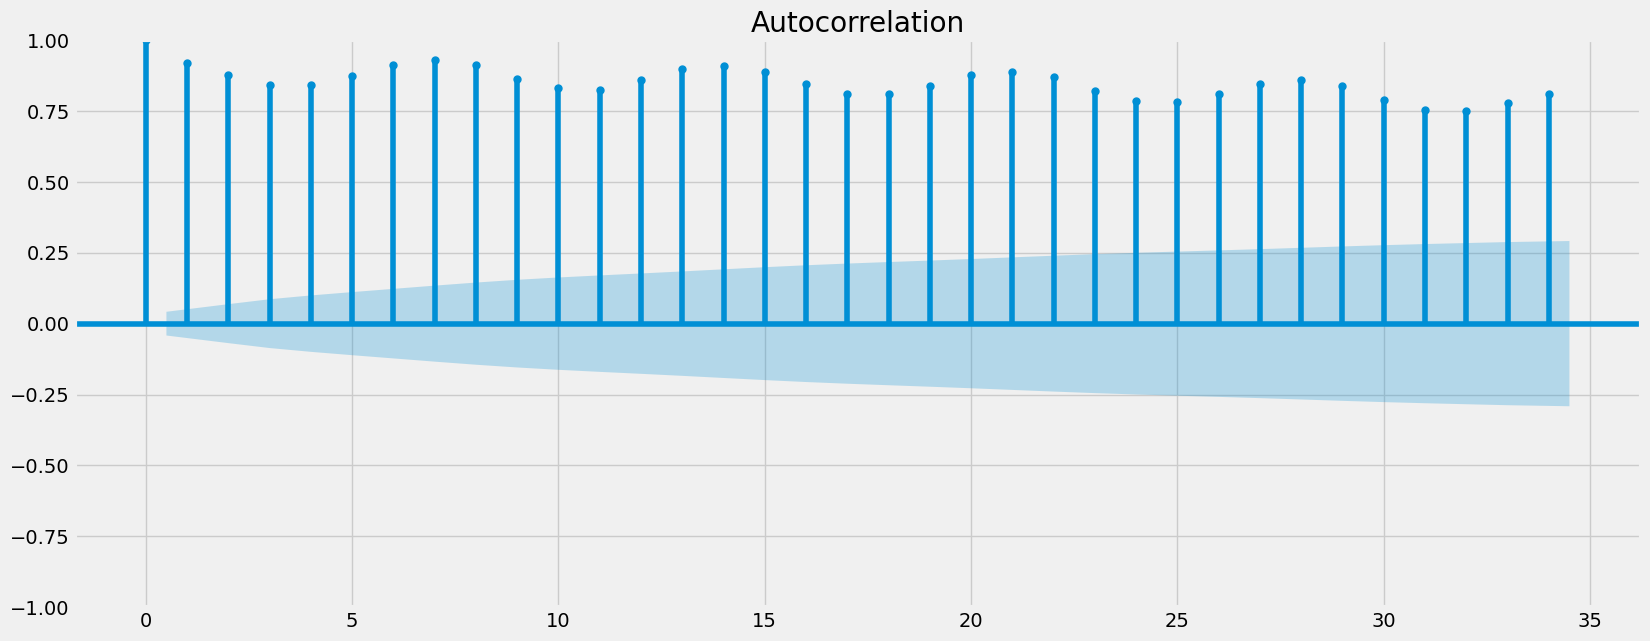

In [99]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sales_sub)
plt.show()

# Stationarizing the Sales Data

In [100]:
data_diff = sales_sub - sales_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [101]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [102]:
data_diff.head()

,number_sold
datetime,
2013-01-02,32.0
2013-01-03,-23.0
2013-01-04,-33.0
2013-01-05,244.0
2013-01-06,56.0


In [103]:
#Checking the columns
data_diff.columns

Index(['number_sold'], dtype='object')

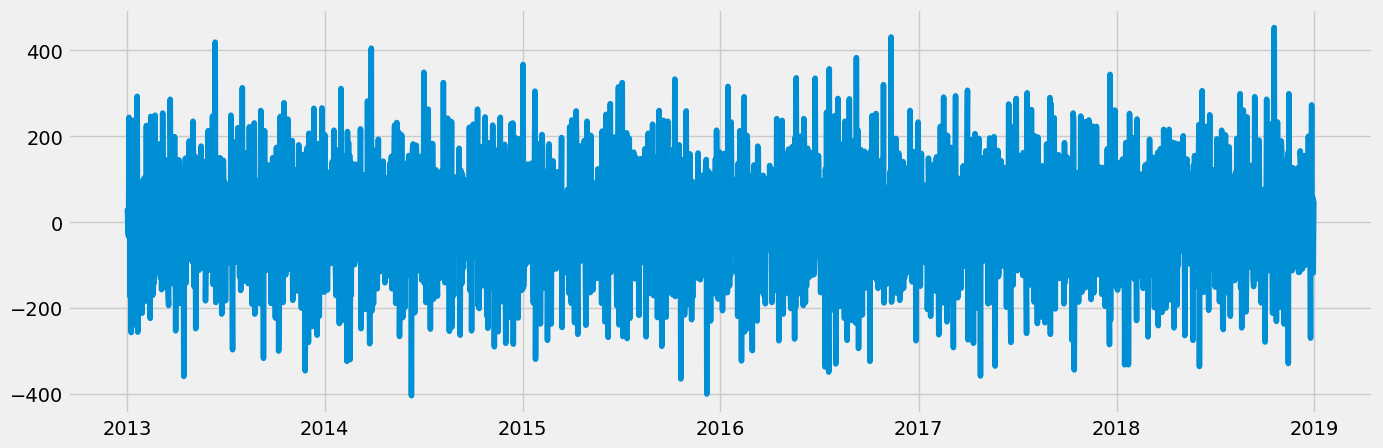

In [104]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [105]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.660486e+00
p-value                        1.693839e-11
Number of Lags Used            2.400000e+01
Number of Observations Used    2.165000e+03
Critical Value (1%)           -3.433374e+00
Critical Value (5%)           -2.862876e+00
Critical Value (10%)          -2.567481e+00
dtype: float64


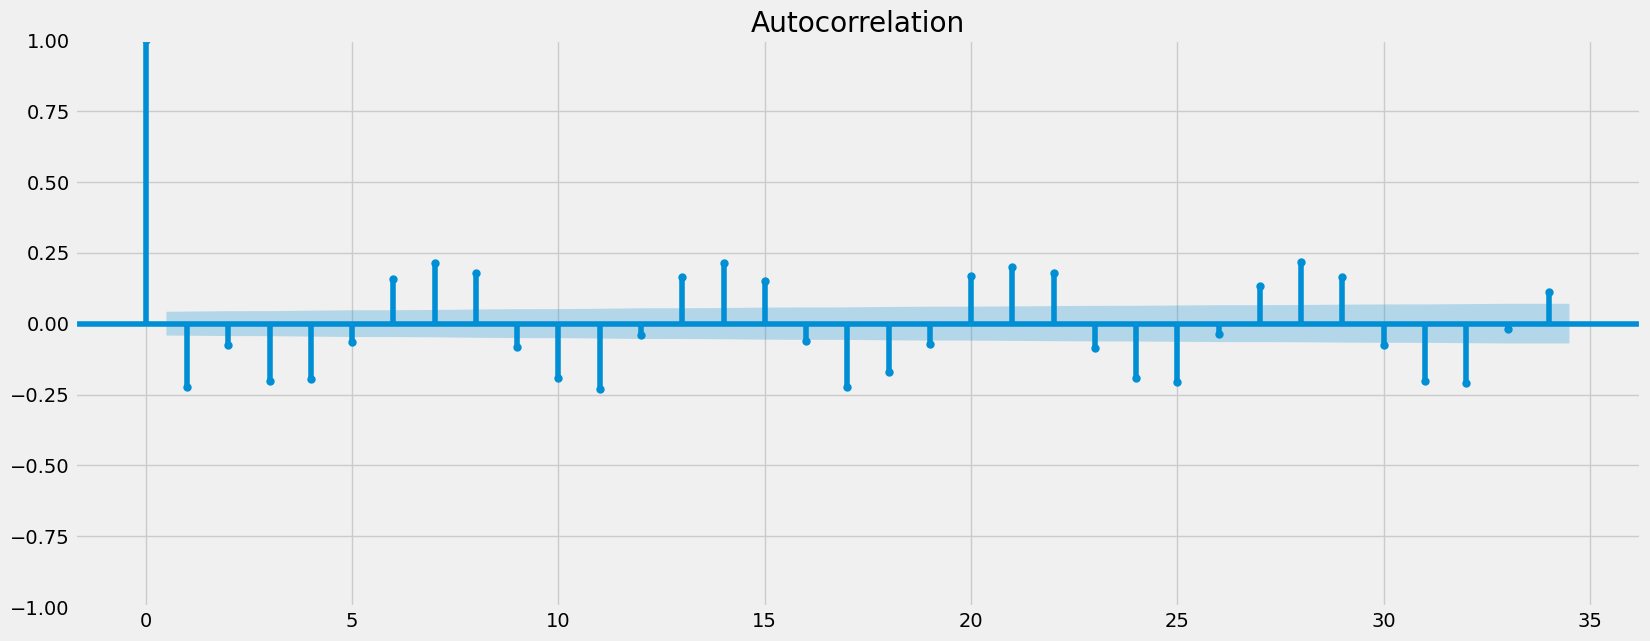

In [106]:
plot_acf(data_diff)
plt.show()

As we can see from the above Stationarity test, the Test statistic value is smaller than the Critical Values. Hence, the data is stationarity. Also from the auto-correlation graph, we can see that there is a lag interval of 2. This shows that the data is stationary.